In [9]:
import numpy as np
import pandas as pd
import matplotlib as  mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
from datetime import timedelta
# 有时候运行代码时会有很多warning输出，像提醒新版本之类的，如果不想这些乱糟糟的输出，可以使用如下代码
warnings.filterwarnings('ignore')
# 用来显示中文标签
mpl.rcParams["font.family"] = "SimHei"
# 用来显示负号
mpl.rcParams["axes.unicode_minus"] = False

In [10]:
# 写入数据

with open(r'D:\Desktop\淘宝用户行为数据\UserBehavior.csv', 'r',encoding='utf-8') as f: 
        with open(r'D:\Desktop\淘宝用户行为数据\UserBehavior_newnew.csv','w',encoding='utf-8') as fout: 
            block = [] 
            for line in f: 
                block.append(line) 
                if len(block) <= 10000:  
                        fout.write(','.join(line.split(' ')))  
                else: 
                      break 


In [11]:
df = pd.read_csv(r"D:\Desktop\淘宝用户行为数据\UserBehavior_newnew.csv",encoding='utf-8',header=None,names=['用户id','商品ID','商品类目ID','行为类型','时间戳'])

In [12]:
df

,用户id,商品ID,商品类目ID,行为类型,时间戳
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
...,...,...,...,...,...
9995,1000436,2279117,405755,pv,1512184711
9996,1000436,1542569,3619575,buy,1512184723
9997,1000436,2279117,405755,pv,1512184785
9998,1000436,3249912,2920476,pv,1512184868


In [13]:
#查看是否存在重复的行数据
(df.duplicated()).sum()

0

In [14]:
#查看列中是否存在缺失数据返回true证明有缺失数据,false：没有缺失数据
df.isnull().any(axis=0)

用户id      False
商品ID      False
商品类目ID    False
行为类型      False
时间戳       False
dtype: bool

In [15]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户id    5 non-null      int64 
 1   商品ID    5 non-null      int64 
 2   商品类目ID  5 non-null      int64 
 3   行为类型    5 non-null      object
 4   时间戳     5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 328.0+ bytes


In [16]:
df['时间戳']=df['时间戳'].astype('str')

In [17]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户id    5 non-null      int64 
 1   商品ID    5 non-null      int64 
 2   商品类目ID  5 non-null      int64 
 3   行为类型    5 non-null      object
 4   时间戳     5 non-null      object
dtypes: int64(3), object(2)
memory usage: 328.0+ bytes


In [18]:
df['时间戳']=pd.to_datetime(df['时间戳'],unit='s')

In [19]:
df

,用户id,商品ID,商品类目ID,行为类型,时间戳
0,1,2268318,2520377,pv,2017-11-24 17:21:10
1,1,2333346,2520771,pv,2017-11-24 22:15:33
2,1,2576651,149192,pv,2017-11-25 01:21:25
3,1,3830808,4181361,pv,2017-11-25 07:04:53
4,1,4365585,2520377,pv,2017-11-25 07:49:06
...,...,...,...,...,...
9995,1000436,2279117,405755,pv,2017-12-02 03:18:31
9996,1000436,1542569,3619575,buy,2017-12-02 03:18:43
9997,1000436,2279117,405755,pv,2017-12-02 03:19:45
9998,1000436,3249912,2920476,pv,2017-12-02 03:21:08


In [20]:
df.时间戳=pd.to_datetime(df['时间戳'])
df['date']=df['时间戳'].dt.date

In [21]:
df.head()

,用户id,商品ID,商品类目ID,行为类型,时间戳,date
0,1,2268318,2520377,pv,2017-11-24 17:21:10,2017-11-24
1,1,2333346,2520771,pv,2017-11-24 22:15:33,2017-11-24
2,1,2576651,149192,pv,2017-11-25 01:21:25,2017-11-25
3,1,3830808,4181361,pv,2017-11-25 07:04:53,2017-11-25
4,1,4365585,2520377,pv,2017-11-25 07:49:06,2017-11-25


In [22]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户id    5 non-null      int64         
 1   商品ID    5 non-null      int64         
 2   商品类目ID  5 non-null      int64         
 3   行为类型    5 non-null      object        
 4   时间戳     5 non-null      datetime64[ns]
 5   date    5 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 368.0+ bytes


In [23]:
df['时间戳'].value_counts()

2017-11-25 16:14:27    4
2017-11-24 17:19:06    3
2017-11-29 15:25:39    3
2017-12-02 00:26:27    2
2017-11-27 11:00:36    2
                      ..
2017-11-29 15:38:19    1
2017-11-28 07:13:17    1
2017-11-28 07:13:49    1
2017-11-26 03:01:40    1
2017-11-25 06:23:12    1
Name: 时间戳, Length: 9905, dtype: int64

In [24]:
df['时间戳']>'2017-01-01'

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: 时间戳, Length: 10000, dtype: bool

<BarContainer object of 4 artists>

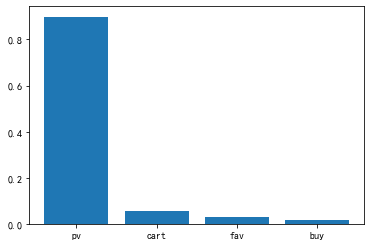

In [25]:
#对所有用户的购买行为进行数据统计，求得不同购买行为的百分比柱状图
s_percent=df['行为类型'].value_counts()/df['行为类型'].value_counts().sum()
plt.bar(s_percent.index,s_percent.values)

<BarContainer object of 4 artists>

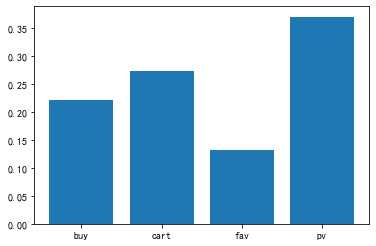

In [26]:
#正确做法：对行为类型进行分组
s_percent=df.groupby(by='行为类型')['用户id'].nunique()/df.groupby(by='行为类型')['用户id'].nunique().sum()
plt.bar(s_percent.index,s_percent.values)

In [27]:
#分析出每个用户对商品的不同行为
one_hot_df=pd.get_dummies(df['行为类型'])
user_item_behavior_df=pd.concat((df[['用户id','商品ID']],one_hot_df),axis=1)#对两张表进行横向拼接
user_item_behavior_df.head()

,用户id,商品ID,buy,cart,fav,pv
0,1,2268318,0,0,0,1
1,1,2333346,0,0,0,1
2,1,2576651,0,0,0,1
3,1,3830808,0,0,0,1
4,1,4365585,0,0,0,1


In [28]:
#分析出每个用户对商品的不同行为的a汇总
#对用户分组（考虑用户的重复情况）
pv_sum=user_item_behavior_df.groupby(by='用户id')['pv'].sum()
buy_sum=user_item_behavior_df.groupby(by='用户id')['buy'].sum()
cart_sum=user_item_behavior_df.groupby(by='用户id')['cart'].sum()
fav_sum=user_item_behavior_df.groupby(by='用户id')['fav'].sum()

In [29]:
user_behavior_total_df=pd.DataFrame(data=[pv_sum,buy_sum,cart_sum,fav_sum]).T#.T为转置
user_behavior_total_df.head()

,pv,buy,cart,fav
用户id,,,,
1,55.0,0.0,0.0,0.0
100,84.0,8.0,0.0,6.0
1000,67.0,0.0,2.0,12.0
10001,21.0,0.0,0.0,0.0
100002,84.0,1.0,0.0,7.0


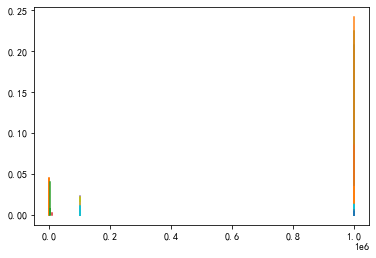

In [30]:
pv_percent=user_behavior_total_df['pv']/user_behavior_total_df['pv'].sum()
buy_percent=user_behavior_total_df['buy']/user_behavior_total_df['buy'].sum()
cart_percent=user_behavior_total_df['cart']/user_behavior_total_df['cart'].sum()
fav_percent=user_behavior_total_df['fav']/user_behavior_total_df['fav'].sum()
index=[pv_percent.index,buy_percent.index,cart_percent.index,fav_percent.index]
label=['pv','buy','cart','fav']
values=[pv_percent.values,buy_percent.values,cart_percent.values,fav_percent.values]

plt.plot(index,values)

In [31]:
#所有用户的总点击量
user_behavior_total_df['pv'].sum()

8986.0

In [32]:
#点击——购买行为统计
user_behavior_total_df.query('pv>0 & cart==0 & fav==0 & buy>0').shape[0]

4

In [43]:
#点击——加购行为统计
user_behavior_total_df.query('pv>0 & cart>0 & fav==0 & buy==0').shape[0]

15

In [44]:
#点击——加购——购买
user_behavior_total_df.query('pv>0 & cart>0 & fav==0 & buy>0').shape[0]

32

In [45]:
#点击——收藏
user_behavior_total_df.query('pv>0 & cart==0 & fav>0 & buy==0').shape[0]

6

In [46]:
#点击——收藏——购买
user_behavior_total_df.query('pv>0 & cart==0 & fav>0 & buy>0').shape[0]

6

In [47]:
#点击——收藏+加购
user_behavior_total_df.query('pv>0 & cart>0 & fav>0').shape[0]

21

In [48]:
#点击——收藏+加购——购买
user_behavior_total_df.query('pv>0 & cart>0 & fav>0 & buy>0').shape[0]

13

In [49]:
#点击——流失
user_behavior_total_df.query('pv>0 & cart==0 & fav==0 & buy==0').shape[0]

8

In [53]:
#直接购买转化率：点击——购买/点击量
#加购购买转化率：点击——加购+购买/点击——加购
#收藏购买转化率：点击——收藏——购买/点击——收藏
#加购收藏购买转化率：点击——收藏+加购——购买/点击——收藏+加购
#流失率：点击——流失、点击量
buyvert=user_behavior_total_df.query('pv>0 & cart==0 & fav==0 & buy>0').shape[0]/user_behavior_total_df['pv'].sum()
cartvert=user_behavior_total_df.query('pv>0 & cart>0 & fav==0 & buy>0').shape[0]/user_behavior_total_df.query('pv>0 & cart>0 & fav==0 & buy==0').shape[0]
favvert=user_behavior_total_df.query('pv>0 & cart==0 & fav>0 & buy>0').shape[0]/user_behavior_total_df.query('pv>0 & cart==0 & fav>0 & buy==0').shape[0]
cartfavbuyvert=user_behavior_total_df.query('pv>0 & cart>0 & fav>0 & buy>0').shape[0]/user_behavior_total_df.query('pv>0 & cart>0 & fav>0').shape[0]
lose=user_behavior_total_df.query('pv>0 & cart==0 & fav==0 & buy==0').shape[0]/user_behavior_total_df['pv'].sum()


In [54]:
buyvert

0.0004451368795904741

In [55]:
cartvert

2.1333333333333333

In [56]:
favvert

1.0

In [57]:
cartfavbuyvert

0.6190476190476191

In [58]:
lose

0.0008902737591809482

In [59]:
#分析出点击量前10的商品
pv_sum_item_10_s=user_item_behavior_df.groupby(by='商品ID')['pv'].sum().sort_values().tail(10)
pv_sum_item_10_s

商品ID
1962765    10
404297     11
1669287    11
4354614    12
987677     12
2492167    15
3471238    16
3454985    17
1545024    18
4350284    22
Name: pv, dtype: uint8

In [60]:
#购买量前十的商品
buy_sum_item_10_s=user_item_behavior_df.groupby(by='商品ID')['buy'].sum().sort_values().tail(10)
buy_sum_item_10_s

商品ID
3294376    2
1486733    2
843421     2
1242107    2
387031     2
167362     2
2712827    2
2397544    2
4753136    2
1545024    2
Name: buy, dtype: uint8

In [61]:
#查看点击量高购买量也高的商品类别个数
buy_sum_item_10_s.append(pv_sum_item_10_s).index.value_counts()

1545024    2
1486733    1
2712827    1
1242107    1
387031     1
4354614    1
1962765    1
2397544    1
4753136    1
4350284    1
167362     1
2492167    1
404297     1
3294376    1
1669287    1
3471238    1
3454985    1
987677     1
843421     1
Name: 商品ID, dtype: int64

In [62]:
#计算点击量前十的商品的购买量
pv_10_buy=[]
for index in pv_sum_item_10_s.index:
    buy_count=user_item_behavior_df.loc[user_item_behavior_df['商品ID']==index]['buy'].sum()
    dic={
        '商品ID':index,
        '购买量':buy_count
    }
    pv_10_buy.append(dic)
pv_10_buy

[{'商品ID': 1962765, '购买量': 1},
 {'商品ID': 404297, '购买量': 1},
 {'商品ID': 1669287, '购买量': 0},
 {'商品ID': 4354614, '购买量': 0},
 {'商品ID': 987677, '购买量': 0},
 {'商品ID': 2492167, '购买量': 0},
 {'商品ID': 3471238, '购买量': 0},
 {'商品ID': 3454985, '购买量': 0},
 {'商品ID': 1545024, '购买量': 2},
 {'商品ID': 4350284, '购买量': 1}]

In [181]:
#购买量前十的点击量
buy_10_pv=[]
for index in buy_sum_item_10_s.index:
    pv_sum=user_item_behavior_df.loc[user_item_behavior_df['商品ID']==index]['pv'].sum()
    dic={
        '商品ID':index,
        '点击量':pv_sum
    }
    buy_10_pv.append(dic)
buy_10_pv

[{'商品ID': 3294376, '点击量': 3},
 {'商品ID': 1486733, '点击量': 7},
 {'商品ID': 843421, '点击量': 1},
 {'商品ID': 1242107, '点击量': 1},
 {'商品ID': 387031, '点击量': 3},
 {'商品ID': 167362, '点击量': 3},
 {'商品ID': 2712827, '点击量': 6},
 {'商品ID': 2397544, '点击量': 0},
 {'商品ID': 4753136, '点击量': 1},
 {'商品ID': 1545024, '点击量': 18}]

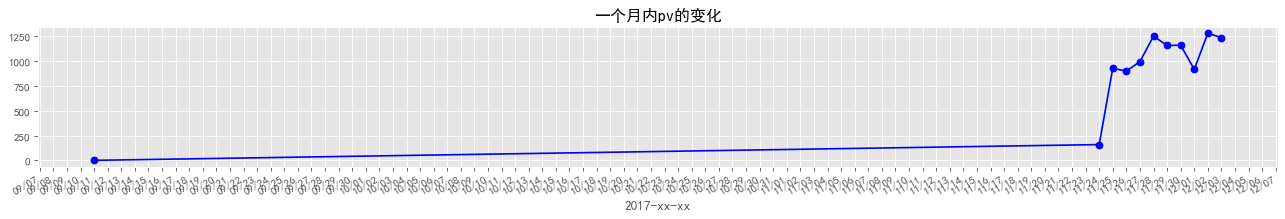

In [197]:

#每天pv、uv的变化
data_pv=df.groupby('date').用户id.count()
data_uv=df.groupby('date').用户id.nunique()

#mdates=df['时间戳']
plt.style.use('ggplot')
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(data_pv.index,data_pv.values,'bo-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内pv的变化')
plt.show()

In [194]:
#发现空白值过多
ex=(df['时间戳']>='2017-11-07')&(df['时间戳']<='2017-12-07')
df_new=df.loc[ex]
df_new['时间戳'].max(),df_new['时间戳'].min()

(Timestamp('2017-12-03 15:59:18'), Timestamp('2017-11-24 15:41:20'))

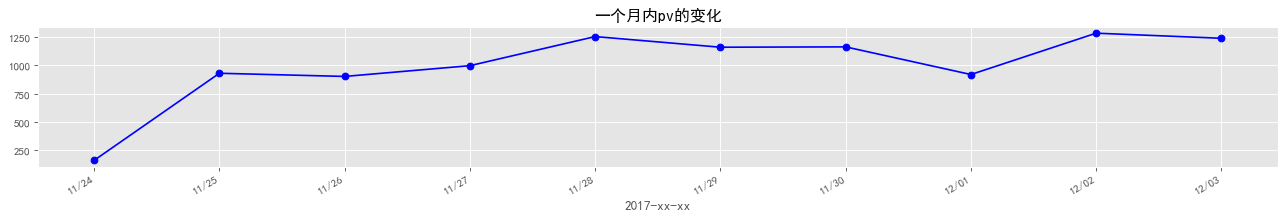

In [195]:
#每天pv、uv的变化
data_pv=df_new.groupby('date').用户id.count()
data_uv=df_new.groupby('date').用户id.nunique()

#mdates=df['时间戳']
plt.style.use('ggplot')
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(data_pv.index,data_pv.values,'bo-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内pv的变化')
plt.show()

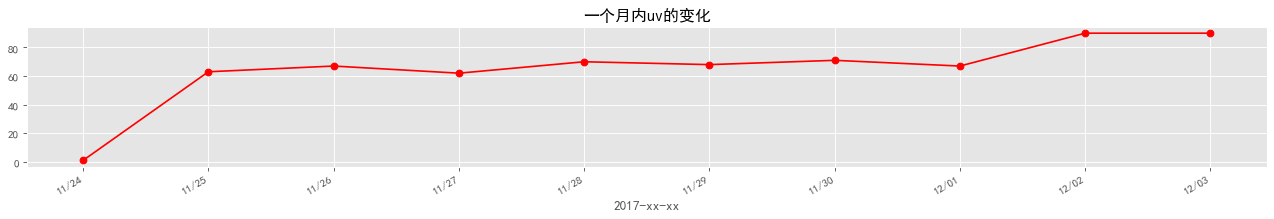

In [191]:
plt.figure(figsize=(20,18),dpi=80)
plt.subplot(611)
plt.plot(data_uv.index,data_uv.values,'ro-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()#自动旋转日期标记
plt.xlabel('2017-xx-xx')
plt.title('一个月内uv的变化')
plt.show()

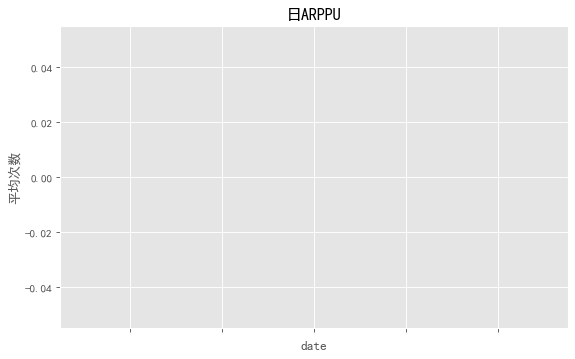

In [188]:
#运营指标：日ARPPU,日ARPU
#日ARPPU每付费平均费用=总收入/活跃付费用户数（由于没有具体金额，所以使用消费总数代替总金额）
#每天每人消费总次数
one_user_buy1=df_new[df_new['行为类型']=='付款'].groupby(['date','用户id']).size().reset_index().rename(columns={0:'total'})
#one_user_buy1.head()
one_user_buy2=one_user_buy1.groupby('date')['total'].sum()/one_user_buy1.groupby('date')['total'].count()
plt.figure(figsize=(18,5), dpi=80)
plt.subplot(121)
one_user_buy2.plot()
plt.ylabel('平均次数')
plt.title('日ARPPU')
plt.show()

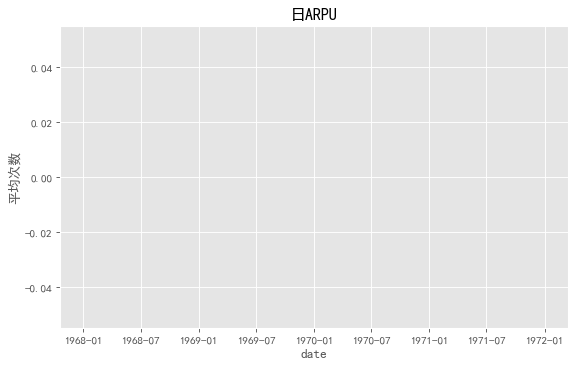

In [253]:
#日ARPU平均每活跃用户消费次数
df['operation']=1
#每天不同用户不同行为类型次数
df_user_active1=df.groupby(['date','用户id','行为类型'])['operation'].count().reset_index().rename(columns={'operation':'total'})
#data_user_active.head()
plt.figure(figsize=(18,5), dpi=80)
plt.subplot(122)
data_user_active2=df_user_active1.groupby('date').apply(lambda x: x[x.行为类型 =='付款'].total.sum()/len(x.用户id.unique()))
data_user_active2.plot()
plt.ylabel('平均次数')
plt.title('日ARPU')
plt.show()
